目标：
写一个脚本，生成5*5的图片组。
1. 每行是一个动作视频的五种模态图片展示，其顺序分别为rgb、depth、skeleton、flow、tg
2. 图片的目录地址结构大致如下：
imp_datasets/video_datasets/data/hmdb/{模态名}_l8/{动作类别名称}/{动作视频名称}/{图片名}
需要根据这一结构，代码中动态获取五个动作视频的第一张图片，然后输出打印输出的图片(需要把每张图片resize成224*224)。
3. 将上面的输出的图片进行整合成一个5*5的图片结构，并在每行图片左侧标注其对应的动作类别名字。

/tmp/ipykernel_39858/1748478412.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('multi_modality.png', DPI=300)


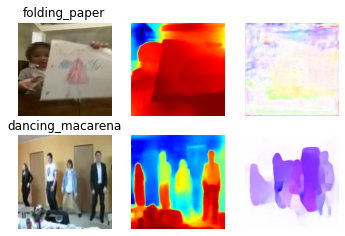

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 定义图片类型和数据集路径
image_types = ["rgb", "depth", "skeleton", "flow", "TG"]
base_dir = "imp_datasets/video_datasets/data/hmdb"

# 假设我们有五个动作类别，每个类别有一个视频
action_classes = ["brush_hair", "catch", "drink", "eat", "hug"]

fig = plt.figure(figsize=(10, 10))
outer = gridspec.GridSpec(5, 1, wspace=0.2, hspace=0.2)

for i, action_class in enumerate(action_classes):
    inner = gridspec.GridSpecFromSubplotSpec(1, 5,
                  subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    # 为每个模态类型找到对应的第一张图片
    for j, image_type in enumerate(image_types):
        # 构建路径
        dir_path = os.path.join(base_dir, f"{image_type}_l8", action_class)
        video_name = os.listdir(dir_path)[0]  # 获取第一个视频名称
        video_path = os.path.join(dir_path, video_name)
        image_name = sorted(os.listdir(video_path))[0]  # 获取第一张图片
        image_path = os.path.join(video_path, image_name)

        # 读取图片并调整大小
        image = Image.open(image_path)
        image = image.resize((224, 224))

        # 在subplot上展示图片
        ax = plt.Subplot(fig, inner[j])
        ax.imshow(image)
        ax.axis('off')
        if j == 0:
            ax.set_title(action_class)  # 如果是每行的第一张图片，添加类别名字作为标题
        fig.add_subplot(ax)

# 展示图片
plt.savefig('multi_modality.png', DPI=300)
plt.show()


目标：
写一个脚本，生成5*3的图片组。
1. 每行是一个动作视频的三种模态图片展示，其顺序分别为rgb、depth、flow
2. 图片的目录地址结构大致如下：
imp_datasets/video_datasets/data/kinetics/{模态名}_l8/{动作类别名称}/{动作视频名称}/{图片名}
需要根据这一结构，代码中动态获取三个动作视频的第一张图片，然后输出打印输出的图片(需要把每张图片resize成224*224)。
3. 动作类别分别为：["folding_paper", "dancing_macarena", "arm_wrestling", "cleaning_floor", "cutting_watermelon"]， 动作视频名称分别为：["AuRwIjsfllM_000054_000064", "1-tbCY0OyZE_000193_000203", "-pyI_lAbB9k_000309_000319", "_C9RbOUuzEo_000014_000024", "_Tvojm_mKVM_000042_000052"]

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# 定义动作类别和视频名称
action_categories = ["Dancing_ballet","VolleyballSpiking","PommelHorse","HorseRace","GolfSwing","folding_paper", "dancing_macarena", "arm_wrestling", "cleaning_floor", "cutting_watermelon"]
video_names = ["_2gDwnq9OqA_000079_000089","v_VolleyballSpiking_g25_c04","v_PommelHorse_g01_c01","v_HorseRace_g03_c04","v_GolfSwing_g01_c03","AuRwIjsfllM_000054_000064", "1-tbCY0OyZE_000193_000203", "-pyI_lAbB9k_000309_000319", "_C9RbOUuzEo_000014_000024", "_Tvojm_mKVM_000042_000052"]

# 定义模态
modalities = ['rgb', 'depth', 'flow']

# 定义图片的基本路径
base_dir = "imp_datasets/video_datasets/data/kinetics"

# 创建5x3子图
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(5, 7))

# 按照要求生成图片
for i, (action_category, video_name) in enumerate(zip(action_categories, video_names)):
    for j, modality in enumerate(modalities):
        # 构建每个图片的路径
        img_path = os.path.join(base_dir, f'{modality}_l8', action_category, video_name)
        img_name = sorted(os.listdir(img_path))[0]  # 获取目录下的第一张图片
        img_path = os.path.join(img_path, img_name)

        # 使用opencv读取并resize图片
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))

        # 将图片展示在子图上
        axes[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i, j].set_title(f'{action_category} - {modality}', fontsize=8)
        axes[i, j].axis('off')

# 展示所有图片
plt.tight_layout()
plt.savefig('multi_modality.pdf', DPI=300)
plt.show()


: 